# Trial Problem

# Vary in x

dt =  1.220703125e-05
Saving data at t = 1.00e-03
Saving data at t = 2.00e-03
Saving data at t = 3.00e-03
Saving data at t = 4.00e-03
Saving data at t = 5.00e-03
Saving data at t = 6.01e-03
Saving data at t = 7.01e-03
Saving data at t = 8.01e-03
Saving data at t = 9.01e-03
Saving data at t = 1.00e-02
Saving data at t = 1.10e-02
Saving data at t = 1.20e-02
Saving data at t = 1.30e-02
Saving data at t = 1.40e-02
Saving data at t = 1.50e-02
Saving data at t = 1.60e-02
Saving data at t = 1.70e-02
Saving data at t = 1.80e-02
Saving data at t = 1.90e-02
Saving data at t = 2.00e-02
Saving data at t = 2.10e-02
Saving data at t = 2.20e-02
Saving data at t = 2.30e-02
Saving data at t = 2.40e-02
Saving data at t = 2.50e-02
Saving data at t = 2.60e-02
Saving data at t = 2.70e-02
Saving data at t = 2.80e-02
Saving data at t = 2.90e-02
Saving data at t = 3.00e-02
Saving data at t = 3.10e-02
Saving data at t = 3.20e-02
Saving data at t = 3.30e-02
Saving data at t = 3.40e-02
Saving data at t = 3.50e-0

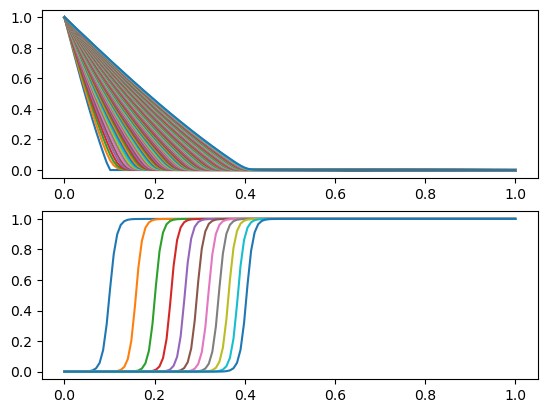

In [3]:
import numpy as np
from scipy.special import erf
from scipy.optimize import root_scalar

# Parameters
# ==========
# Number of grid points
Nx = 128 + 1
# Size of domain in x
Lx = 1.0
# x-coordinate vector
x = np.linspace(0, Lx, Nx)
# Grid spacing in x
dx = x[1] - x[0]

Ny = 128 + 1
# Size of domain in y
Ly = 1.0
# x-coordinate vector
y = np.linspace(0, Ly, Ny)
# Grid spacing in x
dy = y[1] - y[0]

Y, X = np.meshgrid(y, x)

# Phase-field parameters
A = 1.0
eps = (1/128)
D = 1.2/A


# Similarity solution parameter
def f_lam(x):
    return np.sqrt(np.pi)*x*np.exp(x**2)*erf(x) - 1.0
lam = root_scalar(f_lam, bracket=[0, 1]).root

# Initial interface position (make phi 2-D)
h = 0.1
# Initial conditions for phi and T
phi = np.zeros((x.size, y.size))
phi[:,:] = 0.5*(1+np.tanh((X-h)/(2*eps)))
T = np.zeros((x.size, y.size))
T[X<h] = 1.0 - erf(lam*X[X<h]/h)/erf(lam)
# R = np.sqrt((X-0.5)**2 + (Y-0.5)**2)
# T[R<0.2] = 1.0

# Storage arrays for time evolution
phi_save = np.zeros((Nx, Ny, 101))
T_save = np.zeros((Nx, Ny, 101))
phi_save[:,:, 0] = phi
T_save[:,:, 0] = T

# Time-stepping parameters
simtime = 0.0   # Current simulation time

dt = 1e-5  # Time step
dt = 0.2*dx**2
print('dt = ',dt)

t_end = 0.1     # End simulation time
dt_save = t_end/100 # Interval for saving data

# Temporary arrays for time-stepping
dphi = np.zeros((x.size, y.size))
dT = np.zeros((x.size, y.size))
De2 = D/eps**2

def step_time():
    global phi, T
    dphi = np.zeros((x.size, y.size))
    dphi[:,:] +=  dt*(-De2*phi*(1 - phi)*(1 - 2*phi + A*T))
    #dphi[:,1:Ny-1] +=  D*dt*( (1/(dy**2))*np.diff(phi,2,axis=1) ) 
    dphi[1:Nx-1,:] +=  D*dt*( (1/(dx**2))*np.diff(phi,2,axis=0) )
    
    phi += dphi

    dT = np.zeros((x.size, y.size))
    dT[1:Nx-1,1:Ny-1] += dphi[1:Nx-1,1:Ny-1]
    #dT[:,1:Ny-1] +=  dt*( (1/(dy**2))*np.diff(T,2,axis=1) )
    dT[1:Nx-1,:] +=  dt*( (1/(dx**2))*np.diff(T,2,axis=0) ) 
                         
    # T[1:Nx-1,1:Ny-1] += dT[1:Nx-1,1:Ny-1]
    T += dT
    return

import time

t1 = time.time()
# Main loop
while simtime < t_end:
    step_time()
    simtime += dt
    if simtime % dt_save < dt:
        print('Saving data at t = %.2e' % simtime)
        phi_save[:,:, int(simtime/dt_save)] = phi
        T_save[:,:, int(simtime/dt_save)] = T
t2 = time.time()
print('Elapsed time: %.2f seconds' % (t2 - t1))

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
ax = axs[0]
ax.plot(x, T_save[:,100,:])
axs[1].plot(x, phi_save[:,100,::10])
plt.show()

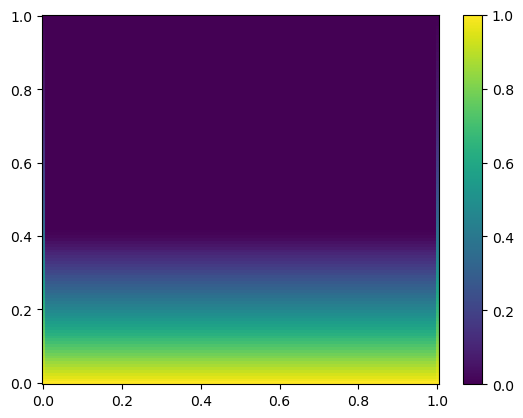

In [5]:
plt.pcolormesh(x, y, T_save[:,:,100])
plt.colorbar()
plt.show()

# Vary in y

dt =  1.220703125e-05
Saving data at t = 1.00e-03
Saving data at t = 2.00e-03
Saving data at t = 3.00e-03
Saving data at t = 4.00e-03
Saving data at t = 5.00e-03
Saving data at t = 6.01e-03
Saving data at t = 7.01e-03
Saving data at t = 8.01e-03
Saving data at t = 9.01e-03
Saving data at t = 1.00e-02
Saving data at t = 1.10e-02
Saving data at t = 1.20e-02
Saving data at t = 1.30e-02
Saving data at t = 1.40e-02
Saving data at t = 1.50e-02
Saving data at t = 1.60e-02
Saving data at t = 1.70e-02
Saving data at t = 1.80e-02
Saving data at t = 1.90e-02
Saving data at t = 2.00e-02
Saving data at t = 2.10e-02
Saving data at t = 2.20e-02
Saving data at t = 2.30e-02
Saving data at t = 2.40e-02
Saving data at t = 2.50e-02
Saving data at t = 2.60e-02
Saving data at t = 2.70e-02
Saving data at t = 2.80e-02
Saving data at t = 2.90e-02
Saving data at t = 3.00e-02
Saving data at t = 3.10e-02
Saving data at t = 3.20e-02
Saving data at t = 3.30e-02
Saving data at t = 3.40e-02
Saving data at t = 3.50e-0

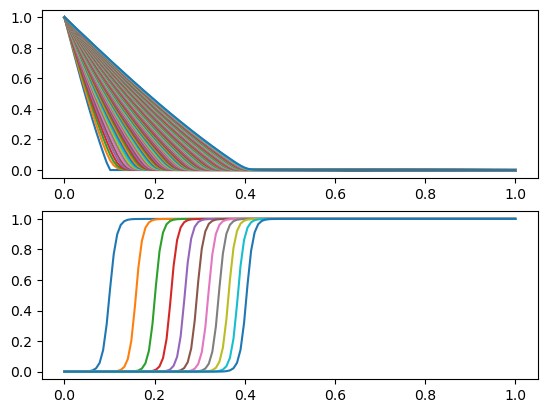

In [8]:
import numpy as np
from scipy.special import erf
from scipy.optimize import root_scalar

# Parameters
# ==========
# Number of grid points
Nx = 128 + 1
# Size of domain in x
Lx = 1.0
# x-coordinate vector
x = np.linspace(0, Lx, Nx)
# Grid spacing in x
dx = x[1] - x[0]

Ny = 128 + 1
# Size of domain in y
Ly = 1.0
# x-coordinate vector
y = np.linspace(0, Ly, Ny)
# Grid spacing in x
dy = y[1] - y[0]

Y, X = np.meshgrid(y, x)

# Phase-field parameters
A = 1.0
eps = (1/128)
D = 1.2/A


# Similarity solution parameter
def f_lam(x):
    return np.sqrt(np.pi)*x*np.exp(x**2)*erf(x) - 1.0
lam = root_scalar(f_lam, bracket=[0, 1]).root

# Initial interface position (make phi 2-D)
h = 0.1
# Initial conditions for phi and T
phi = np.zeros((x.size, y.size))
phi[:,:] = 0.5*(1+np.tanh((Y-h)/(2*eps)))
T = np.zeros((x.size, y.size))
T[Y<h] = 1.0 - erf(lam*Y[Y<h]/h)/erf(lam)
# R = np.sqrt((X-0.5)**2 + (Y-0.5)**2)
# T[R<0.2] = 1.0

# Storage arrays for time evolution
phi_save = np.zeros((Nx, Ny, 101))
T_save = np.zeros((Nx, Ny, 101))
phi_save[:,:, 0] = phi
T_save[:,:, 0] = T

# Time-stepping parameters
simtime = 0.0   # Current simulation time

dt = 1e-5  # Time step
dt = 0.2*dx**2
print('dt = ',dt)

t_end = 0.1     # End simulation time
dt_save = t_end/100 # Interval for saving data

# Temporary arrays for time-stepping
dphi = np.zeros((x.size, y.size))
dT = np.zeros((x.size, y.size))
De2 = D/eps**2

def step_time():
    global phi, T
    dphi = np.zeros((x.size, y.size))
    dphi[:,:] +=  dt*(-De2*phi*(1 - phi)*(1 - 2*phi + A*T))
    dphi[:,1:Ny-1] +=  D*dt*( (1/(dy**2))*np.diff(phi,2,axis=1) ) 
    #dphi[1:Nx-1,:] +=  D*dt*( (1/(dx**2))*np.diff(phi,2,axis=0) )
    
    phi += dphi

    dT = np.zeros((x.size, y.size))
    dT[1:Nx-1,1:Ny-1] += dphi[1:Nx-1,1:Ny-1]
    dT[:,1:Ny-1] +=  dt*( (1/(dy**2))*np.diff(T,2,axis=1) )
    #dT[1:Nx-1,:] +=  dt*( (1/(dx**2))*np.diff(T,2,axis=0) ) 
                         
    # T[1:Nx-1,1:Ny-1] += dT[1:Nx-1,1:Ny-1]
    T += dT
    return

import time

t1 = time.time()
# Main loop
while simtime < t_end:
    step_time()
    simtime += dt
    if simtime % dt_save < dt:
        print('Saving data at t = %.2e' % simtime)
        phi_save[:,:, int(simtime/dt_save)] = phi
        T_save[:,:, int(simtime/dt_save)] = T
t2 = time.time()
print('Elapsed time: %.2f seconds' % (t2 - t1))

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
ax = axs[0]
ax.plot(y, T_save[100,:,:])
axs[1].plot(y, phi_save[100,:,::10])
plt.show()

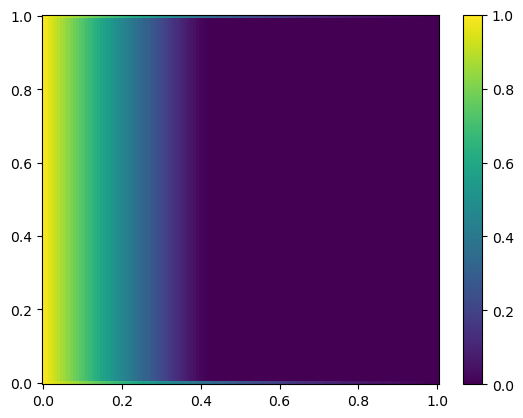

In [10]:
plt.pcolormesh(x, y, T_save[:,:,100])
plt.colorbar()
plt.show()

# Circle Example

In [13]:
import numpy as np
from scipy.special import erf
from scipy.optimize import root_scalar

# Parameters
# ==========
# Number of grid points
Nx = 128 + 1
# Size of domain in x
Lx = 1.0
# x-coordinate vector
x = np.linspace(0, Lx, Nx)
# Grid spacing in x
dx = x[1] - x[0]

Ny = 128 + 1
# Size of domain in y
Ly = 1.0
# x-coordinate vector
y = np.linspace(0, Ly, Ny)
# Grid spacing in x
dy = y[1] - y[0]

X, Y = np.meshgrid(x, y)

# Phase-field parameters
A = 1.0
eps = (1/128)
D = 1.2/A

# Similarity solution parameter
def f_lam(x):
    return np.sqrt(np.pi)*x*np.exp(x**2)*erf(x) - 1.0
lam = root_scalar(f_lam, bracket=[0, 1]).root

T = np.zeros((x.size, y.size))
#T[Y<h] = 1.0 - erf(lam*Y[Y<h]/h)/erf(lam)
R = np.sqrt((X-0.5)**2 + (Y-0.5)**2)
T[R > 0.2] = 1.0

# Storage arrays for time evolution
T_save = np.zeros((Nx, Ny, 101))
T_save[:,:, 0] = T

# Time-stepping parameters
simtime = 0.0   # Current simulation time

dt = 1e-5  # Time step
dt = 0.2*dx**2
print('dt = ',dt)

t_end = 0.1     # End simulation time
dt_save = t_end/100 # Interval for saving data

# Temporary arrays for time-stepping
dphi = np.zeros((x.size, y.size))
dT = np.zeros((x.size, y.size))
De2 = D/eps**2

def step_time():
    global T
    
    dT = np.zeros((x.size, y.size))
    dT[1:Nx-1,1:Ny-1] += dphi[1:Nx-1,1:Ny-1]
    dT[:,1:Nx-1] +=  dt*( (1/(dx**2))*np.diff(T,2,axis=1) )
    dT[1:Ny-1,:] +=  dt*( (1/(dy**2))*np.diff(T,2,axis=0) ) 
                         
    T += dT
    return

import time

t1 = time.time()
# Main loop
while simtime < t_end:
    step_time()
    simtime += dt
    if simtime % dt_save < dt:
        print('Saving data at t = %.2e' % simtime)
        phi_save[:,:, int(simtime/dt_save)] = phi
        T_save[:,:, int(simtime/dt_save)] = T
t2 = time.time()
print('Elapsed time: %.2f seconds' % (t2 - t1))

dt =  1.220703125e-05
Saving data at t = 1.00e-03
Saving data at t = 2.00e-03
Saving data at t = 3.00e-03
Saving data at t = 4.00e-03
Saving data at t = 5.00e-03
Saving data at t = 6.01e-03
Saving data at t = 7.01e-03
Saving data at t = 8.01e-03
Saving data at t = 9.01e-03
Saving data at t = 1.00e-02
Saving data at t = 1.10e-02
Saving data at t = 1.20e-02
Saving data at t = 1.30e-02
Saving data at t = 1.40e-02
Saving data at t = 1.50e-02
Saving data at t = 1.60e-02
Saving data at t = 1.70e-02
Saving data at t = 1.80e-02
Saving data at t = 1.90e-02
Saving data at t = 2.00e-02
Saving data at t = 2.10e-02
Saving data at t = 2.20e-02
Saving data at t = 2.30e-02
Saving data at t = 2.40e-02
Saving data at t = 2.50e-02
Saving data at t = 2.60e-02
Saving data at t = 2.70e-02
Saving data at t = 2.80e-02
Saving data at t = 2.90e-02
Saving data at t = 3.00e-02
Saving data at t = 3.10e-02
Saving data at t = 3.20e-02
Saving data at t = 3.30e-02
Saving data at t = 3.40e-02
Saving data at t = 3.50e-0

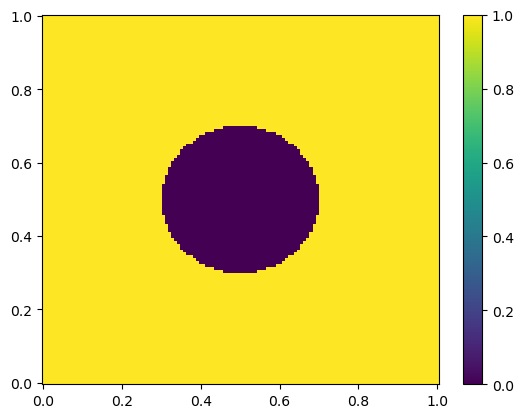

In [15]:
plt.pcolormesh(x, y, T_save[:,:,0])
plt.colorbar()
plt.show()

# Favier

In [20]:
import numpy as np
from scipy.special import erf
from scipy.optimize import root_scalar

# Parameters
# ==========
# Number of grid points
Nx = 256 + 1
# Size of domain in x
Lx = 1.0
# x-coordinate vector
x = np.linspace(0, Lx, Nx)
# Grid spacing in x
dx = x[1] - x[0]

Ny = 256 + 1
# Size of domain in y
Ly = 1.0
# x-coordinate vector
y = np.linspace(0, Ly, Ny)
# Grid spacing in x
dy = y[1] - y[0]

X, Y = np.meshgrid(x, y)

# Phase-field parameters
As = 256
eps = (1/256)
A = As*eps
D = 1.2/A

Tm = 0.5

# Similarity solution parameter
def f_lam(x):
    return np.sqrt(np.pi)*x*np.exp(x**2)*erf(x) - 1.0
lam = root_scalar(f_lam, bracket=[0, 1]).root


# Initial interface position (make phi 2-D)
h = 0.1

T = np.zeros((x.size, y.size))
R = np.sqrt((X-0.5)**2 + (Y-0.5)**2)

T = 0.5*(1+np.tanh(100*(R-h)))

# Storage arrays for time evolution
T_save = np.zeros((Nx, Ny, 101))
T_save[:,:, 0] = T

phi = np.zeros((x.size, y.size))
phi = 0.5*(1-np.tanh((R -h)/(2*eps)))

# Storage arrays for time evolution
phi_save = np.zeros((Nx, Ny, 101))
T_save = np.zeros((Nx, Ny, 101))
phi_save[:,:, 0] = phi
T_save[:,:, 0] = T

# Time-stepping parameters
simtime = 0.0   # Current simulation time

dt = 0.17*dx**2
print('dt = ',dt)

t_end = 0.025     # End simulation time
dt_save = t_end/100 # Interval for saving data

# Temporary arrays for time-stepping
dphi = np.zeros((x.size, y.size))
dT = np.zeros((x.size, y.size))
De2 = D/eps**2

def step_time():
    global phi, T
    dphi = np.zeros((x.size, y.size))
    dphi[:,:] +=  dt*(-De2*phi*(1 - phi)*(1 - 2*phi + A*(T-Tm)))
    dphi[:,1:Ny-1] +=  D*dt*( (1/(dy**2))*np.diff(phi,2,axis=1) ) 
    dphi[1:Nx-1,:] +=  D*dt*( (1/(dx**2))*np.diff(phi,2,axis=0) )
    phi += dphi
    
    dT = np.zeros((x.size, y.size))
    dT[1:Nx-1,1:Ny-1] += dphi[1:Nx-1,1:Ny-1]
    dT[:,1:Nx-1] +=  dt*( (1/(dx**2))*np.diff(T,2,axis=1) )
    dT[1:Ny-1,:] +=  dt*( (1/(dy**2))*np.diff(T,2,axis=0) )                          
    T += dT
    return

import time

t1 = time.time()
# Main loop
while simtime < t_end:
    step_time()
    simtime += dt
    if simtime % dt_save < dt:
        print('Saving data at t = %.2e' % simtime)
        phi_save[:,:, int(simtime/dt_save)] = phi
        T_save[:,:, int(simtime/dt_save)] = T
t2 = time.time()
print('Elapsed time: %.2f seconds' % (t2 - t1))

dt =  2.593994140625e-06
Saving data at t = 2.52e-04
Saving data at t = 5.01e-04
Saving data at t = 7.52e-04
Saving data at t = 1.00e-03
Saving data at t = 1.25e-03
Saving data at t = 1.50e-03
Saving data at t = 1.75e-03
Saving data at t = 2.00e-03
Saving data at t = 2.25e-03
Saving data at t = 2.50e-03
Saving data at t = 2.75e-03
Saving data at t = 3.00e-03
Saving data at t = 3.25e-03
Saving data at t = 3.50e-03
Saving data at t = 3.75e-03
Saving data at t = 4.00e-03
Saving data at t = 4.25e-03
Saving data at t = 4.50e-03
Saving data at t = 4.75e-03
Saving data at t = 5.00e-03
Saving data at t = 5.25e-03
Saving data at t = 5.50e-03
Saving data at t = 5.75e-03
Saving data at t = 6.00e-03
Saving data at t = 6.25e-03
Saving data at t = 6.50e-03
Saving data at t = 6.75e-03
Saving data at t = 7.00e-03
Saving data at t = 7.25e-03
Saving data at t = 7.50e-03
Saving data at t = 7.75e-03
Saving data at t = 8.00e-03
Saving data at t = 8.25e-03
Saving data at t = 8.50e-03
Saving data at t = 8.75

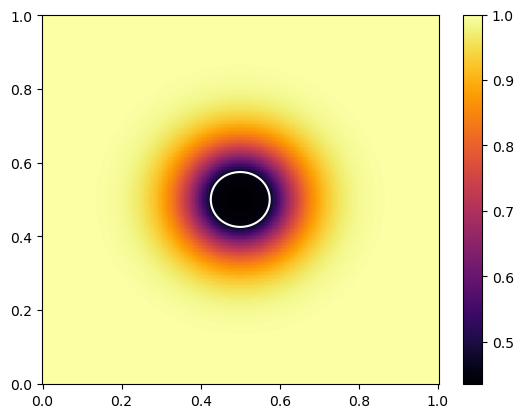

In [22]:
idx = 20
plt.pcolormesh(x, y, T_save[:,:,idx], cmap='inferno')#, clim=[0,1])
plt.colorbar()
plt.contour(x, y, phi_save[:,:,idx], levels=[0.5], colors='w')
# plt.pcolormesh(x, y, phi_save[:,:,10])
plt.show()


In [24]:
#np.savez('epsAs_2D_As_1024', T=T_save, phi=phi_save, dt=dt)

# Animation

/var/folders/9h/nmgxk6252393vjm65h0cjxxr0000gn/T/ipykernel_77232/2005059984.py:20: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in contour.collections:


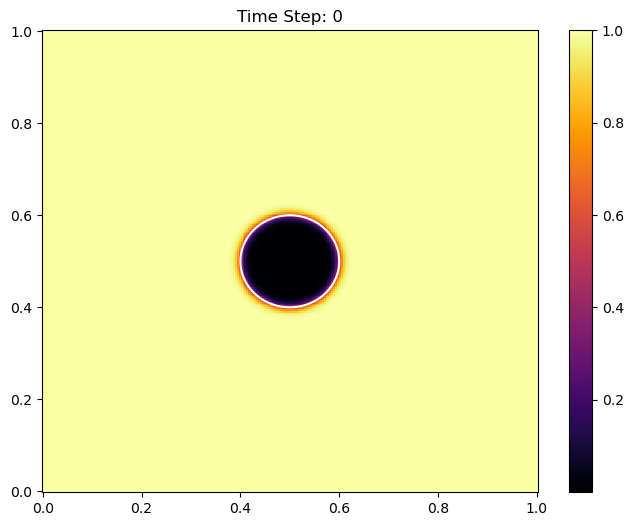

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

num_frames = T_save.shape[2]  # Number of time steps

fig, ax = plt.subplots(figsize=(8, 6))

cmap = 'inferno'
pcolormesh = ax.pcolormesh(x, y, T_save[:, :, 0], cmap=cmap)
contour = ax.contour(x, y, phi_save[:, :, 0], levels=[0.5], colors='w')

cbar = plt.colorbar(pcolormesh, ax=ax)
title = ax.set_title("Time Step: 0")

def animate(idx):
    global contour  
    
    for c in contour.collections:
        c.remove()

    pcolormesh.set_array(T_save[:, :, idx].ravel())  # Update temperature field
    contour = ax.contour(x, y, phi_save[:, :, idx], levels=[0.5], colors='w')
    title.set_text(f"Time Step: {idx}")

    return pcolormesh, contour, title

ani = animation.FuncAnimation(fig, animate, frames=num_frames, interval=100, blit=False)
HTML(ani.to_jshtml())

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!